is the presence of a physical bank branch creating demand for checking accounts? intuitively it should. 
send me a quick summary.

### 1. prepare data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('/Users/monster/Desktop/dobby/NTU_BA/T2_AY2024/6901Storytelling/NB/NB_data.xlsx', sheet_name='Nils Baker data',index_col='ID',nrows=120)

In [3]:
df

,Total Households in Area,Households with Account,Inside/Outside Footprint
ID,,,
1,1772960,17563,Outside
2,1345209,14547,Outside
3,960434,10847,Outside
4,928274,18133,Inside
5,893995,5291,Outside
...,...,...,...
116,9025,338,Inside
117,8843,42,Inside
118,8480,284,Outside


In [4]:
df['perc'] = df['Households with Account']/df['Total Households in Area']*100
df['perc'] = df['perc'].round(2)

In [5]:
df

,Total Households in Area,Households with Account,Inside/Outside Footprint,perc
ID,,,,
1,1772960,17563,Outside,0.99
2,1345209,14547,Outside,1.08
3,960434,10847,Outside,1.13
4,928274,18133,Inside,1.95
5,893995,5291,Outside,0.59
...,...,...,...,...
116,9025,338,Inside,3.75
117,8843,42,Inside,0.47
118,8480,284,Outside,3.35


### 2. descriptive

In [6]:
df_inside = df[df['Inside/Outside Footprint'] == 'Inside']
df_in_desc = df_inside.describe().round(2)
print(df_in_desc)



       Total Households in Area  Households with Account   perc
count                     53.00                    53.00  53.00
mean                   69434.15                  1189.60   1.65
std                   129139.26                  2672.44   1.84
min                     1799.00                    13.00   0.47
25%                    29034.00                   330.00   0.92
50%                    37553.00                   466.00   1.20
75%                    52194.00                   817.00   1.89
max                   928274.00                 18133.00  13.66


In [7]:
df_outside = df[df['Inside/Outside Footprint'] == 'Outside']
df_out_desc = df_outside.describe().round(2)
print(df_out_desc)


       Total Households in Area  Households with Account   perc
count                     67.00                    67.00  67.00
mean                  236303.15                  2627.19   1.24
std                   335672.59                  3619.28   0.74
min                     5019.00                    87.00   0.53
25%                    30380.50                   325.00   0.70
50%                   100089.00                  1178.00   1.01
75%                   281337.00                  3346.00   1.48
max                  1772960.00                 17563.00   4.01


In [8]:
# compare mean(1.65/1.24 > 0.41), median(1.2/1.01 > 0.19), max(13.66/4.01 > 9.65)
df_in_desc.columns = [f"in_{col}" for col in df_in_desc.columns]
df_out_desc.columns = [f"out_{col}" for col in df_out_desc.columns]

combined_desc = pd.concat([df_in_desc, df_out_desc], axis=1)
combined_desc


,in_Total Households in Area,in_Households with Account,in_perc,out_Total Households in Area,out_Households with Account,out_perc
count,53.00,53.00,53.00,67.00,67.00,67.00
mean,69434.15,1189.60,1.65,236303.15,2627.19,1.24
std,129139.26,2672.44,1.84,335672.59,3619.28,0.74
min,1799.00,13.00,0.47,5019.00,87.00,0.53
25%,29034.00,330.00,0.92,30380.50,325.00,0.70
50%,37553.00,466.00,1.20,100089.00,1178.00,1.01
75%,52194.00,817.00,1.89,281337.00,3346.00,1.48
max,928274.00,18133.00,13.66,1772960.00,17563.00,4.01


In [9]:
combined_desc = combined_desc[[i for i in ('in_perc', 'out_perc')]]
combined_desc_t = combined_desc.transpose()
combined_desc_t


,count,mean,std,min,25%,50%,75%,max
in_perc,53.0,1.65,1.84,0.47,0.92,1.20,1.89,13.66
out_perc,67.0,1.24,0.74,0.53,0.70,1.01,1.48,4.01


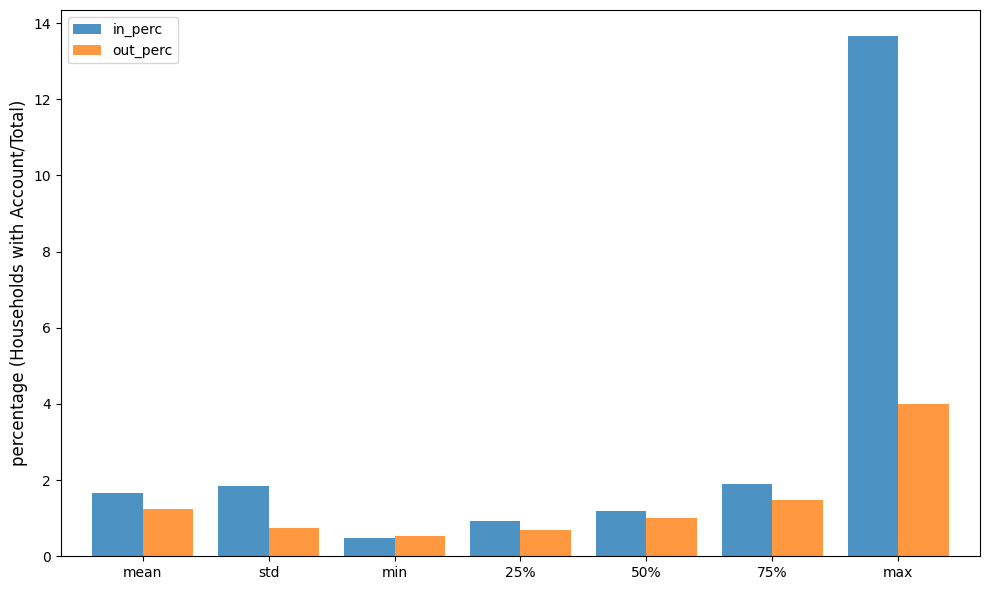

In [10]:
combined_desc = combined_desc[combined_desc.index != 'count']
fig, ax = plt.subplots(figsize=(10, 6))
combined_desc.plot(kind='bar', stacked=False, ax=ax, width=0.8, alpha=0.8)

ax.set_ylabel('percentage (Households with Account/Total)', fontsize=12)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

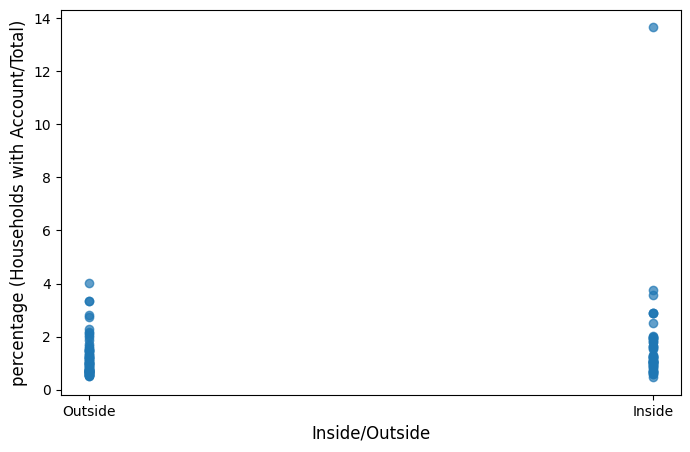

In [11]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Inside/Outside Footprint'], df['perc'], alpha=0.7)

plt.xlabel('Inside/Outside', fontsize=12)
plt.ylabel('percentage (Households with Account/Total)', fontsize=12)

plt.show()

/var/folders/xl/v2d6_bws3352wtfw95r6pg6r0000gn/T/ipykernel_20011/3324684963.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot([df[df['Inside/Outside Footprint'] == 'Inside']['perc'], df[df['Inside/Outside Footprint'] == 'Outside']['perc']], labels=['inside', 'outside'], patch_artist=True)


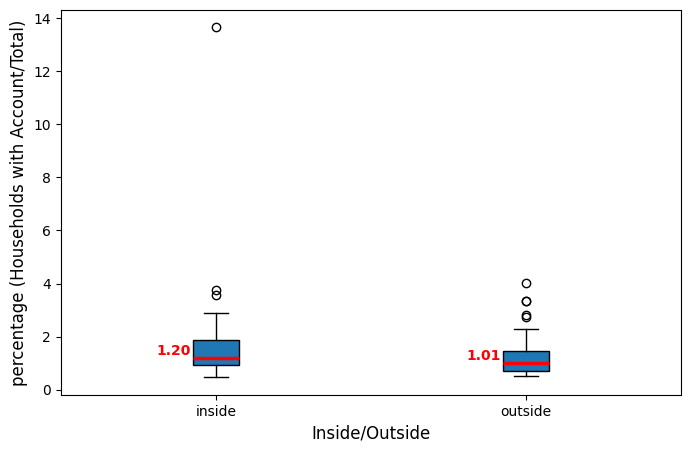

In [12]:
plt.figure(figsize=(8, 5))
box = plt.boxplot([df[df['Inside/Outside Footprint'] == 'Inside']['perc'], df[df['Inside/Outside Footprint'] == 'Outside']['perc']], labels=['inside', 'outside'], patch_artist=True)

for median, label in zip(box['medians'], ['inside', 'outside']):
    median.set_linewidth(2.5)
    median.set_color('red')
    median_value = median.get_ydata()[0]
    plt.text(median.get_xdata()[0]-0.06, median_value, f'{median_value:.2f}', 
             ha='center', va='bottom', fontsize=10, color='red', weight='bold')

plt.xlabel('Inside/Outside', fontsize=12)
plt.ylabel('percentage (Households with Account/Total)', fontsize=12)

plt.show()

### 3. explanatory

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

df['footprint_encoded'] = df['Inside/Outside Footprint'].map({'Inside': 1, 'Outside': 0})

X = df[['footprint_encoded']]  
y = df['perc']            

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Coefficient: 0.5747089947089946
Intercept: 1.1931481481481483
MSE: 0.8816134253427022
R^2 Score: -0.22089860379995052


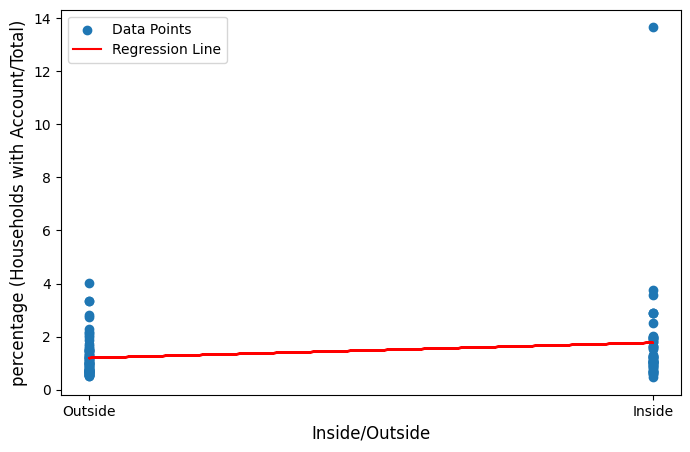

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

plt.figure(figsize=(8, 5))
plt.scatter(df['footprint_encoded'], df['perc'], label='Data Points')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xticks([0, 1], ['Outside', 'Inside'])  
plt.xlabel('Inside/Outside', fontsize=12)
plt.ylabel('percentage (Households with Account/Total)', fontsize=12)
plt.legend()
plt.show()

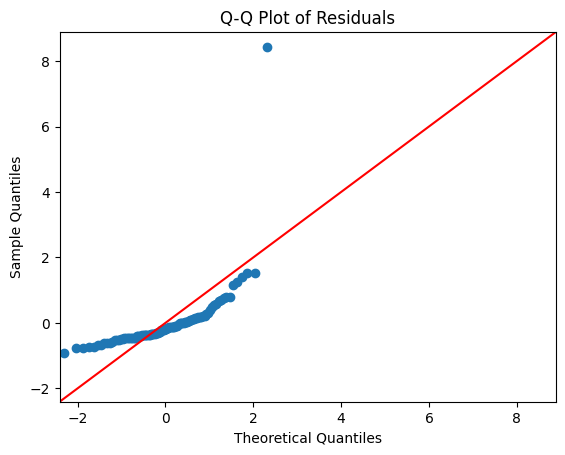

In [9]:
import statsmodels.api as sm

y_pred = model.predict(X_train)
residuals = y_train - y_pred

# 绘制 Q-Q 图
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


In [25]:
from scipy.stats import levene

# Predict on the test set
y_pred = model.predict(X_test)

# Convert y_test to Pandas Series for alignment
y_test = pd.Series(y_test, index=np.arange(len(y_test)))
y_pred = pd.Series(y_pred, index=np.arange(len(y_pred)))

# Calculate residuals
residuals = y_test - y_pred

# Bin the predicted values into 3 groups
bins = pd.qcut(y_pred, q=3, labels=False, duplicates='drop')

# Ensure residuals and bins have aligned indices
residuals.index = bins.index  # Align residual indices with bins

# Group residuals based on bins
groups = [residuals[bins == i] for i in bins.unique()]

# Perform Levene's Test
stat, p_value = levene(*groups)

print("Levene's Test Statistic:", stat)
print("p-value:", p_value)

# Interpretation
if p_value > 0.05:
    print("Fail to reject the null hypothesis: Homoscedasticity likely.")
else:
    print("Reject the null hypothesis: Evidence of heteroscedasticity.")

Levene's Test Statistic: nan
p-value: nan
Reject the null hypothesis: Evidence of heteroscedasticity.


In [15]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


MSE: 0.8755086694637747
R^2 Score: -0.21244445857612448


### 4. recommendations

In [ ]:
# 完成 levene's test

In [ ]:
# 完成 t test

In [ ]:
from scipy.stats import ttest_1samp

# 示例数据
data = [12, 14, 15, 16, 19, 20, 21, 22, 23]
hypothesized_mean = 18

# 单样本 t 检验
stat, p_value = ttest_1samp(data, hypothesized_mean)

# 将双尾 p 值转为单尾
p_value_one_tailed = p_value / 2

# 判断均值是否显著大于
if stat > 0 and p_value_one_tailed < 0.05:
    print("拒绝零假设：样本均值显著大于假设值。")
else:
    print("无法拒绝零假设：样本均值不显著大于假设值。")


In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Encode the categorical variable
df['footprint_encoded'] = df['Inside/Outside Footprint'].map({'Inside': 1, 'Outside': 0})

# Define features (X) and target (y)
X = df[['footprint_encoded']]
y = df['perc']

# Apply log transformation to y
y_log = np.log(y)  

# Split the data into training and testing sets
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train_log)

# Make predictions on the test set
y_pred_log = model.predict(X_test)

# Reverse the log transformation
y_pred = np.exp(y_pred_log) - 1  # Subtract 1 to undo the earlier addition

# Calculate metrics
mse = mean_squared_error(np.exp(y_test_log) - 1, y_pred)
r2 = r2_score(np.exp(y_test_log) - 1, y_pred)

# Print results
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)
print("MSE (on original scale):", mse)
print("R^2 Score (on original scale):", r2)


Coefficient: 0.28034816032125826
Intercept: 0.05233091737496644
MSE (on original scale): 0.8047996317903351
R^2 Score (on original scale): -0.11452334838206979


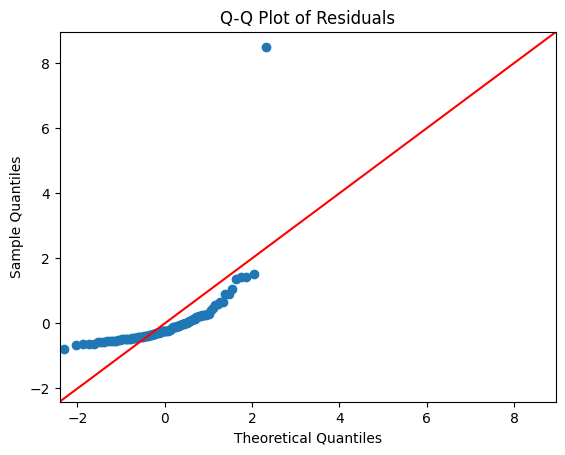

In [30]:
import statsmodels.api as sm

y_pred = model.predict(X_train)
residuals = y_train - y_pred

# 绘制 Q-Q 图
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()
